# 梯度下降线性回归

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

读取房价数据集，随机打乱记录顺序。

In [39]:
housing = np.loadtxt("housing.data").T
housing = housing[:, np.random.permutation(housing.shape[1])]

划分训练集和测试集。

In [40]:
X = housing[:-1, :]
X = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)
X = np.vstack((np.ones(X.shape[1]), X))
y = housing[-1, :]

TRAINSET_SIZE = 400
train_X = X[:, :TRAINSET_SIZE]
train_y = y[:TRAINSET_SIZE]
test_X = X[:, TRAINSET_SIZE:]
test_y = y[TRAINSET_SIZE:]

使用梯度下降法训练权重向量。

In [41]:
[m, n] = train_X.shape
theta = np.random.rand(m, 1)

LEARNING_RATE = 0.01
ITERATION_NUM = 1000

costs = []

for iteration in range(ITERATION_NUM):
    difference = np.dot(theta.T, train_X) - train_y
    gradient = np.dot(train_X, difference.T) / n
    theta -= LEARNING_RATE * gradient
    
    cost = np.sum(difference ** 2) / (2 * n)
    if iteration % 100 == 0:
        costs.append(cost)

绘制预测值与真实值对比的散点图，和损失值变化的折线图。

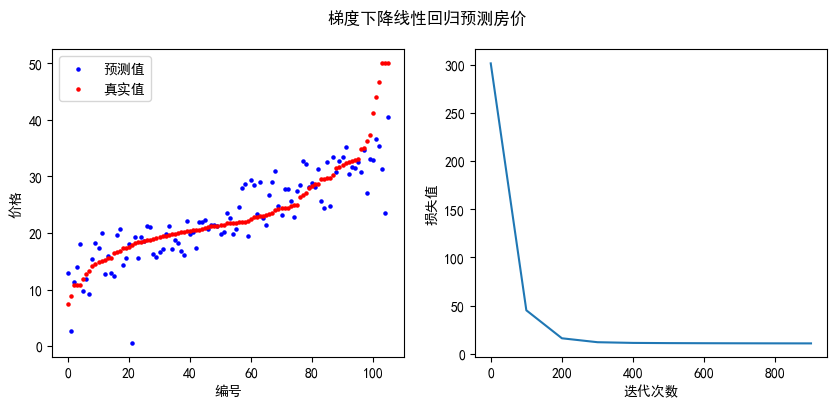

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sort_index = test_y.argsort()
test_X = test_X[:, sort_index]
test_y = test_y[sort_index]

x_axis = np.arange(len(test_y))
predictions = [np.dot(theta.T, x)[0] for x in test_X.T]
axes[0].scatter(x_axis, predictions, s=5, c="blue", label="预测值")
axes[0].scatter(x_axis, test_y, s=5, c="red", label="真实值")
axes[0].set_xlabel("编号")
axes[0].set_ylabel("价格")
axes[0].legend()

axes[1].plot(np.arange(len(costs)) * 100, costs)
axes[1].set_xlabel("迭代次数")
axes[1].set_ylabel("损失值")

fig.suptitle("梯度下降线性回归预测房价")
plt.show()